# Predicting Road Accident Severity Using Machine Learning Models
A Case Study on Road Accident Statistics in the United Kingdom

## Business Understanding

Road accidents became a hot topic for researchers and statisticians due to the increasing number of global traffic accidents recorded each year. According to the World Health Organisation (WHO), there were 1.35 million road traffic deaths in 2016 and road traffic injuries became the leading cause of death for children and young adults (aged 5-29) in recent decades. This shows that it is crucially important to study the factors leading to severe or fatal road accidents and having a better understanding of the circumstances may allow to further improve preventive measures and develop new safety technologies.

The United Kingdom ranks among the top countries for road safety with the second lowest road accident fatality per million inhabitants in the European Union. (European Commission, 2017) There were more than 122 thousand road accidents recorded in 2018 with 25,511 reported severe injuries and 1,784 deaths. Until 2010, fatality rates had been constantly declining and were stabilised on its current rate in the past decade. According to the Department of Transport, extreme weather events have slightly influenced the annual figures, but the overall trends have not changed significantly in this period.

The Department of Transport claims that the highest fatality rate is observed among vulnerable road user groups - namely pedestrians, pedal- and motorcyclist-, as they are more exposed in an event of colliding with other vehicles or objects. Although, there is no single underlying factor that drives road casualties, instead there are a number of influences can be observed. These are mostly distance travelled per driver, the mix of transport modes used, driver's behaviour, the mix of groups using the road (young inexperienced and older drivers) and external effects, such as weather and road conditions. 

With each accident being unique and a number of factors are hard to measure (e.g. fatigue) it is challanging to develop a generalised machine learning (GML) model that can predict accident severity with a high precision. Traditionally, statisticians may use the ordered probit (OP) model, ordered logit (OL) model, multinomial logit (ML) model, and logistic regression (LR) model. In recent years, there have been a wider application of GML models in the field, in particular the Bayesian network (BN) model, regression tree, and artificial neural networks (ANN). In this project, two common GML models will be used, namely the Support Vector Machine (SVM) and the classification tree.

## Data Understanding

For this project the latest road accident and safety statistics was used from 2018, covering the territory of Great Britain. Unfortunately, the data cannot be compared with annual data published before 2015, as the severity reporting has been changed. Considering that the database includes various features regarding the environment, drivers' and casualties' characteristics, it provides a comprehensive description of the circumstances. 

The data is published in three datasets annualy: 
> 1. The first dataset describes the accidents, the number of casualties and in terms of our target variable, which is accident severity, it records, whether at least one party was severly injured or died. In cases, when no such outcome was observed, it is indicated as slight injury. The dataset also doesn't include accidents with property-damage only, only ones, where at least one party was injured. 
> 2. The second dataset describes the driver's behaviour, age, gender and the vehicle's manouver and condition. Unfortunately, there is no record of substance abuse or exceeding the speed limit for 2018, whcih could significantly improve the accuracy of the model. 
> 3. The third dataset describes the casualties, their mode of transport, as well as their behaviour during the accident.

The variable lookup is available trhough the following [link](http://data.dft.gov.uk/road-accidents-safety-data/variable%20lookup.xls). Below, only those variables are feautured that were used for the model development.

*Note: Missing values and values out of range are marked with "-1" in the dataset.

| Variable name | Type | No. of Categories |
| -: | :-: | :-: |
| Accident_Index | Unique Identifier | - |
| Vehicle_Type | Nominal | 20 |
| Vehicle_Leaving_Carriageway | Nominal | 9 |
| Age_Band_of_Driver | Nominal | 11 |
| Sex_of_Driver| Nominal | 3 |
| Pedestrian_Location | Nominal | 11 |
| Accident_Severity | Nominal | 3 |
| Number_of_Vehicles | Numeric | - |
| Number_of_Casualties | Numeric | - |
| 1st_Road_Class | Nominal | 6 |
| Road_Type | Nominal | 7 |
| Speed_limit| Numeric | - |
| Junction_Detail | Nominal | 9 |
| Light_Conditions | Nominal | 5 |
| Weather_Conditions | Nominal | 9 |
| Road_Surface_Conditions | Nominal | 7 |
| Urban_or_Rural_Area | Nominal | 3 |
| Casualty_Type | Nominal | 21 |

Since most of the data is in a nominal scale, most of the variables will need to be transformed into binary variables. This will be achieved by the One Hot Encoding technique in Python. As there were 18 variables used for the model development, only a a selection of key variables is visualised and their relationship analysed with the target variable.

### _Importing data into Pandas dataframe_

_Importing relevant libraries._

In [130]:
import io
import requests
import itertools
import matplotlib.pyplot as plt
from matplotlib.ticker import NullFormatter
import pandas as pd
import numpy as np
import matplotlib.ticker as ticker
from sklearn import preprocessing
%matplotlib inline

_Importing the Road Accindents 2018 dataset into a pandas dataframe._

In [131]:
url="http://data.dft.gov.uk/road-accidents-safety-data/dftRoadSafetyData_Accidents_2018.csv"
s=requests.get(url).content
df1=pd.read_csv(io.StringIO(s.decode('utf-8')))
df1.head()

C:\Anaconda\lib\site-packages\IPython\core\interactiveshell.py:3020: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


Accident_Index  Location_Easting_OSGR  Location_Northing_OSGR  Longitude  \
0  2018010080971               529150.0                182270.0  -0.139737   
1  2018010080973               542020.0                184290.0   0.046471   
2  2018010080974               531720.0                182910.0  -0.102474   
3  2018010080981               541450.0                183220.0   0.037828   
4  2018010080982               543580.0                176500.0   0.065781   

    Latitude  Police_Force  Accident_Severity  Number_of_Vehicles  \
0  51.524587             1                  3                   2   
1  51.539651             1                  3                   1   
2  51.529746             1                  3                   2   
3  51.530179             1                  2                   2   
4  51.469258             1                  2                   2   

   Number_of_Casualties        Date            ...              \
0                     2  01/01/2018            ...               
1                     1  01/01/2018            ...               
2                     1  01/01/2018            ...               
3                     1  01/01/2018            ...               
4                     2  01/01/2018            ...               

   Pedestrian_Crossing-Human_Control Pedestrian_Crossing-Physical_Facilities  \
0                                  0                                       0   
1                                  0                                       0   
2                                  0                                       5   
3                                  0                                       5   
4                                  0                                       0   

   Light_Conditions Weather_Conditions  Road_Surface_Conditions  \
0                 4                  1                        1   
1                 4                  1                        1   
2                 4                  1                        1   
3                 4                  2                        2   
4                 4                  1                        2   

   Special_Conditions_at_Site  Carriageway_Hazards  Urban_or_Rural_Area  \
0                           0                    0                    1   
1                           0                    0                    1   
2                           0                    0                    1   
3                           0                    0                    1   
4                           0                    0                    1   

   Did_Police_Officer_Attend_Scene_of_Accident  LSOA_of_Accident_Location  
0                                            1                  E01000854  
1                                            1                  E01003531  
2                                            1                  E01002723  
3                                            1                  E01003492  
4                                            1                  E01001682  

[5 rows x 32 columns]

_Importing the vehicles' and driver's description._

In [132]:
url="http://data.dft.gov.uk/road-accidents-safety-data/dftRoadSafetyData_Vehicles_2018.csv"
s=requests.get(url).content
df2=pd.read_csv(io.StringIO(s.decode('utf-8')))
df2.head()

Accident_Index  Vehicle_Reference  Vehicle_Type  Towing_and_Articulation  \
0  2018010080971                  1             9                        0   
1  2018010080971                  2             8                        0   
2  2018010080973                  1             9                        0   
3  2018010080974                  1             8                        0   
4  2018010080974                  2             9                        0   

   Vehicle_Manoeuvre  Vehicle_Location-Restricted_Lane  Junction_Location  \
0                 18                                 0                  0   
1                 18                                 0                  0   
2                 18                                 0                  2   
3                  7                                 0                  8   
4                 18                                 0                  1   

   Skidding_and_Overturning  Hit_Object_in_Carriageway  \
0                         0                          0   
1                         0                          0   
2                         0                          0   
3                         0                          0   
4                         0                          0   

   Vehicle_Leaving_Carriageway         ...          Journey_Purpose_of_Driver  \
0                            0         ...                                  6   
1                            0         ...                                  6   
2                            0         ...                                  6   
3                            0         ...                                  1   
4                            3         ...                                  6   

   Sex_of_Driver  Age_of_Driver  Age_Band_of_Driver  Engine_Capacity_(CC)  \
0              1             32                   6                  1995   
1              1             48                   8                  1798   
2              3             -1                  -1                    -1   
3              1             40                   7                  1797   
4              1             21                   5                    -1   

   Propulsion_Code  Age_of_Vehicle  Driver_IMD_Decile  Driver_Home_Area_Type  \
0                2               5                  8                      1   
1                8               6                  1                      1   
2               -1              -1                 -1                     -1   
3                8               6                  3                      1   
4               -1              -1                  5                      1   

   Vehicle_IMD_Decile  
0                   8  
1                   1  
2                  -1  
3                   3  
4                   5  

[5 rows x 23 columns]

_Importing the description of the casualties._

In [133]:
url="http://data.dft.gov.uk/road-accidents-safety-data/dftRoadSafetyData_Casualties_2018.csv"
s=requests.get(url).content
df3=pd.read_csv(io.StringIO(s.decode('utf-8')))
df3.head()

Accident_Index  Vehicle_Reference  Casualty_Reference  Casualty_Class  \
0  2018010080971                  1                   1               2   
1  2018010080971                  2                   2               1   
2  2018010080973                  1                   1               3   
3  2018010080974                  1                   1               1   
4  2018010080981                  1                   1               1   

   Sex_of_Casualty  Age_of_Casualty  Age_Band_of_Casualty  Casualty_Severity  \
0                2               50                     8                  3   
1                1               48                     8                  3   
2                1               29                     6                  3   
3                1               40                     7                  3   
4                1               27                     6                  2   

   Pedestrian_Location  Pedestrian_Movement  Car_Passenger  \
0                    0                    0              2   
1                    0                    0              0   
2                    5                    1              0   
3                    0                    0              0   
4                    0                    0              0   

   Bus_or_Coach_Passenger  Pedestrian_Road_Maintenance_Worker  Casualty_Type  \
0                       0                                   0              9   
1                       0                                   0              8   
2                       0                                   2              0   
3                       0                                   0              8   
4                       0                                   0              9   

   Casualty_Home_Area_Type  Casualty_IMD_Decile  
0                        1                    8  
1                        1                    1  
2                        1                    3  
3                        1                    3  
4                        1                    7

_Getting dataframe dimensions_

In [134]:
print(df1.shape)
print(df2.shape)
print(df3.shape)

(122635, 32)
(226409, 23)
(160597, 16)


As it is seen from the dimensions of the dataframes, they have a different number of rows and columns. The columns correspond to the variables, while the rows to the number of observations. This should be kept in mind, when joining the dataframes.

### _Analysing the Data_

Now, let's install the seaborn package in the notebook. Seaborn is a Python data visualization library based on matplotlib. It provides a high-level interface for drawing attractive and informative statistical graphics.

In [135]:
!conda install -c anaconda seaborn -y

Solving environment: ...working... done

## Package Plan ##

  environment location: C:\Anaconda

  added / updated specs:
    - seaborn


The following packages will be UPDATED:

  ca-certificates    conda-forge::ca-certificates-2020.6.2~ --> anaconda::ca-certificates-2020.7.22-0

The following packages will be SUPERSEDED by a higher-priority channel:

  certifi            conda-forge::certifi-2020.6.20-py37hc~ --> anaconda::certifi-2020.6.20-py37_0
  conda              conda-forge::conda-4.8.5-py37hc8dfbb8~ --> anaconda::conda-4.8.5-py37_0
  openssl            conda-forge::openssl-1.0.2u-hfa6e2cd_0 --> anaconda::openssl-1.0.2u-he774522_0


Preparing transaction: ...working... done
Verifying transaction: ...working... done
Executing transaction: ...working... done


#### Distribution of Accident Severity

C:\Anaconda\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


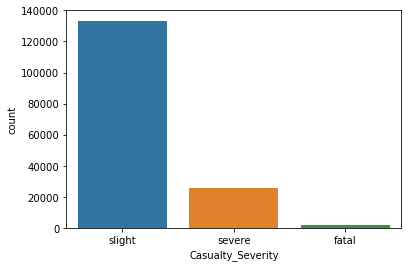

In [136]:
import seaborn as sns
mapping = {
1:'fatal',
2:'severe',
3:'slight'}

df_figure=df3.Casualty_Severity.map(mapping) 

ax = sns.countplot(df_figure)
plt.show()

Having a peek at the above figure, it becomes visible that the distribution of accident severety is extremely skewed. This is also referred to as poisson distribution, when one category has a high number of observation and the frequency of observation rapidly drops in further categories. 

Since there are relatively few fatal accidents observed in the dataset, it is reasonable to merge severe and fatal categories into one category. This will allow better visualisation and a more balanced sample for further statistical analysis. Also, having a binary target variable is more suitable to be used for the selected GML models.

In [137]:
severity=[]
for accident in df1['Accident_Severity']:
    if accident==1 or accident==2: severity.append('Severe') #1 corresponds to fatal and 2 to severe accidents
    else: severity.append('Slight') #3 corresponds to slight injury in the dataset
df1['Severity']=severity
df1=df1.drop('Accident_Severity',axis=1)
df1.head()

Accident_Index  Location_Easting_OSGR  Location_Northing_OSGR  Longitude  \
0  2018010080971               529150.0                182270.0  -0.139737   
1  2018010080973               542020.0                184290.0   0.046471   
2  2018010080974               531720.0                182910.0  -0.102474   
3  2018010080981               541450.0                183220.0   0.037828   
4  2018010080982               543580.0                176500.0   0.065781   

    Latitude  Police_Force  Number_of_Vehicles  Number_of_Casualties  \
0  51.524587             1                   2                     2   
1  51.539651             1                   1                     1   
2  51.529746             1                   2                     1   
3  51.530179             1                   2                     1   
4  51.469258             1                   2                     2   

         Date  Day_of_Week    ...    Pedestrian_Crossing-Physical_Facilities  \
0  01/01/2018            2    ...                                          0   
1  01/01/2018            2    ...                                          0   
2  01/01/2018            2    ...                                          5   
3  01/01/2018            2    ...                                          5   
4  01/01/2018            2    ...                                          0   

   Light_Conditions Weather_Conditions  Road_Surface_Conditions  \
0                 4                  1                        1   
1                 4                  1                        1   
2                 4                  1                        1   
3                 4                  2                        2   
4                 4                  1                        2   

   Special_Conditions_at_Site  Carriageway_Hazards  Urban_or_Rural_Area  \
0                           0                    0                    1   
1                           0                    0                    1   
2                           0                    0                    1   
3                           0                    0                    1   
4                           0                    0                    1   

   Did_Police_Officer_Attend_Scene_of_Accident  LSOA_of_Accident_Location  \
0                                            1                  E01000854   
1                                            1                  E01003531   
2                                            1                  E01002723   
3                                            1                  E01003492   
4                                            1                  E01001682   

   Severity  
0    Slight  
1    Slight  
2    Slight  
3    Severe  
4    Severe  

[5 rows x 32 columns]

#### Urban and Rural Areas

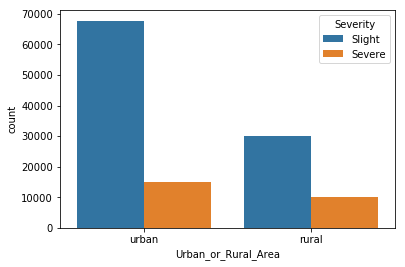

In [138]:
mapping = {
1:'urban',
2:'rural'}

df_figure=df1.Urban_or_Rural_Area.map(mapping)

ax = sns.countplot(x=df_figure, hue="Severity", data=df1)
plt.show()

The figure above shows that while there are more accidents in urban areas, they less likely have a severe or fatal outcome than the ones in rural areas. This can be explained by higher traffic, but lower speed limits. In rural areas due to lower traffic, cars may less likely collide, but there will be a higher chance of sever or fatal outcome due to higher speed limits.

#### Plotting the Accidents on Map

In [139]:
!conda install -c conda-forge folium=0.5.0 --yes
import folium

print('Folium installed and imported!')

Solving environment: ...working... done

## Package Plan ##

  environment location: C:\Anaconda

  added / updated specs:
    - folium=0.5.0


The following packages will be UPDATED:

  conda                        anaconda::conda-4.8.5-py37_0 --> conda-forge::conda-4.8.5-py37hc8dfbb8_1

The following packages will be SUPERSEDED by a higher-priority channel:

  ca-certificates     anaconda::ca-certificates-2020.7.22-0 --> conda-forge::ca-certificates-2020.6.20-hecda079_0
  certifi                anaconda::certifi-2020.6.20-py37_0 --> conda-forge::certifi-2020.6.20-py37hc8dfbb8_0
  openssl               anaconda::openssl-1.0.2u-he774522_0 --> conda-forge::openssl-1.0.2u-hfa6e2cd_0


Preparing transaction: ...working... done
Verifying transaction: ...working... done
Executing transaction: ...working... done
Folium installed and imported!


In [140]:
df_locations=pd.DataFrame(df1[['Longitude','Latitude','Severity']]).reset_index()
df_locations.replace(-1, np.nan, inplace=True)
df_locations.dropna(axis=0, inplace=True,how ='any')
subset=df_locations.sample(n=5000)

In [141]:
import folium
from folium.plugins import FastMarkerCluster


m=folium.Map(location=[53.8074, -3.6078],
                    zoom_start = 5.5, tiles='Stamen Terrain')
def add_marker(row):
    if row['Severity']=='Severe':

        marker=folium.CircleMarker([row['Latitude'],row['Longitude']],radius=2,color='red',popup=row['Severity'])
        marker.add_to(m)

    else:
        marker=folium.CircleMarker([row['Latitude'],row['Longitude']],radius=2,color='blue',popup=row['Severity'])
        marker.add_to(m)

subset.apply(add_marker,axis=1)
m

The map also shows that while there are more accidents around densely populated areas, accidents in peripherial areas tend to be rather severe or fatal. It is also visible that the data the distribution of accident severity is still skewed. In order to address data skewdness in data visualisation, a scale break is introduced via the following procedure, cutting outliers. This will help especially in the case of variables with more categories.

#### Accidents by Road Type

In [142]:
def brokenaxis(col,low_max,h_min,h_max,data):
    
    f, (ax1, ax2) = plt.subplots(ncols=1, nrows=2,
                                 sharex=True)
    ax1 = sns.countplot(x=col, hue='Severity', data=data, ax=ax1) #col refers to variable, we would like to measure

    ax2 = sns.countplot(x=col, hue='Severity', data=data, ax=ax2) #the procedure is repeated for the second half of the y axis

    ax1.set_ylim(h_min,h_max)       #these two lines set, where to cut the y axis.
    ax2.set_ylim(0, low_max)

    ax1.get_xaxis().set_visible(False)

    
    ax1.set_ylabel("")
    ax2.set_ylabel("")
    
    f.text(0.03, 0.55, 'Count', va='center', rotation='vertical') #adding label for the distribution plot

    ax1.get_legend().remove()
    ax2.get_legend().remove()
    
    ax2.legend(loc=(1.026, 1.6), title='Accident Severity')

    # let's put some ticks on the top of the upper part and bottom of the lower part for style
    ax1.xaxis.tick_top()
    ax2.xaxis.tick_bottom()

    # finally, adjust everything a bit to make it prettier (this just moves everything, best to try and iterate)
    f.subplots_adjust(left=0.15, right=0.85, bottom=0.10, top=0.9)
    
    d = .01  # how big to make the diagonal lines in axes coordinates
    
   
    kwargs = dict(transform=ax1.transAxes, color='k', clip_on=False)
    ax1.plot((-d, +d), (-d, +d), **kwargs)        # top-left diagonal
    ax1.plot((1 - d, 1 + d), (-d, +d), **kwargs)  # top-right diagonal

    kwargs.update(transform=ax2.transAxes)  # switch to the bottom axes
    ax2.plot((-d, +d), (1 - d, 1 + d), **kwargs)  # bottom-left diagonal
    ax2.plot((1 - d, 1 + d), (1 - d, 1 + d), **kwargs)  # bottom-right diagonal

    plt.xticks(rotation=45)

    plt.show()

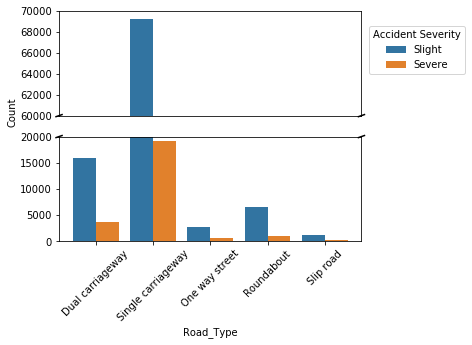

In [143]:
mapping = {
1:'Roundabout',
2:'One way street',
3:'Dual carriageway',
6:'Single carriageway',
7:'Slip road',
12:'Other'}

df_figure=df1.Road_Type.map(mapping)


brokenaxis(df_figure,20000,60000,70000,df1)

The above figure shows that single carriageway roads have the most accidents observed. However, road type is not necessarily a good predictor per se, but it might be kept for later analysis to measure its impact on the target variable with other predictors.

#### Accident Severity by Road User Type

In [144]:
df3["Casualty_Type"].replace(np.nan, df3.Casualty_Type.mode()[0], inplace=True)

In [145]:
Casualty_Type=[]
df_casualty=df3.loc[df3['Casualty_Severity'] < 3,['Casualty_Type']]
for casualty in df_casualty['Casualty_Type']:
        if casualty==0: Casualty_Type.append('Pedestrian')
        elif casualty==1: Casualty_Type.append('Cyclist')
        elif casualty==2 or casualty==3 or casualty==4 or casualty==5 or casualty==23 or casualty==97: Casualty_Type.append('Motorbike')
        elif casualty==8 or casualty==9: Casualty_Type.append('Car')
        elif casualty==10 or casualty==11 or casualty==19 or casualty==20 or casualty==21 or casualty==98: Casualty_Type.append('Truck')
        else: Casualty_Type.append('Other')

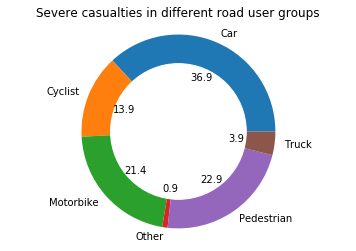

In [146]:
my_circle=plt.Circle((0,0),7, color='white')

df_figure = pd.DataFrame({'freq': Casualty_Type})
df_figure.groupby('freq', as_index=False).size().plot(kind='pie',radius=10,autopct='%.1f',title='Severe casualties in different road user groups')

p=plt.gcf()
p.gca().add_artist(my_circle)
plt.axis('equal')

plt.ylabel('')
plt.show()

The donut chart shows that overall there are more fatal/severe accidents occur among vulnerable road user groups than among their counterparts in cars or heavy vehicles (e.g. buses, truck and so on). This confirms the findings from the literature review and the ariable might be used for further analysis. 

In [147]:
Casualty_Type=[]
df_casualty=df3[['Casualty_Severity','Casualty_Type']]
for casualty in df_casualty['Casualty_Type']:
        if casualty==0: Casualty_Type.append('Pedestrian')
        elif casualty==1: Casualty_Type.append('Cyclist')
        elif casualty==2 or casualty==3 or casualty==4 or casualty==5 or casualty==23 or casualty==97: Casualty_Type.append('Motorbike')
        elif casualty==8 or casualty==9: Casualty_Type.append('Car')
        elif casualty==10 or casualty==11 or casualty==19 or casualty==20 or casualty==21 or casualty==98: Casualty_Type.append('Truck')
        else: Casualty_Type.append('Other')
df_casualty['Casualty_Type']=Casualty_Type

C:\Anaconda\lib\site-packages\ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  # Remove the CWD from sys.path while we load stuff.


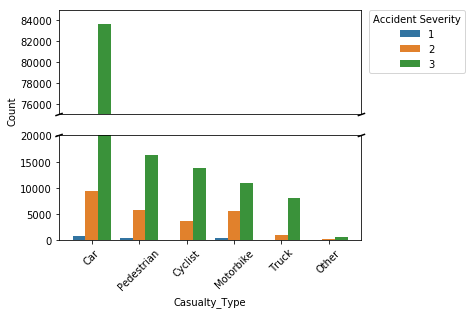

In [148]:
f, (ax1, ax2) = plt.subplots(ncols=1, nrows=2,
                                 sharex=True)
ax1 = sns.countplot(x='Casualty_Type', hue='Casualty_Severity', data=df_casualty, ax=ax1) #col refers to variable, we would like to measure
ax2 = sns.countplot(x='Casualty_Type', hue='Casualty_Severity', data=df_casualty, ax=ax2) #the procedure is repeated for the second half of the y axis

ax1.set_ylim(75000,85000)       #these two lines set, where to cut the y axis.
ax2.set_ylim(0, 20000)
ax1.get_xaxis().set_visible(False)
ax1.set_ylabel("")
ax2.set_ylabel("")
   
f.text(0.03, 0.55, 'Count', va='center', rotation='vertical') #adding label for the distribution plot
ax1.get_legend().remove()
ax2.get_legend().remove()
    
ax2.legend(loc=(1.026, 1.6), title='Accident Severity')

# let's put some ticks on the top of the upper part and bottom of the lower part for style
ax1.xaxis.tick_top()
ax2.xaxis.tick_bottom()
# finally, adjust everything a bit to make it prettier (this just moves everything, best to try and iterate)
f.subplots_adjust(left=0.15, right=0.85, bottom=0.10, top=0.9)
    
d = .01  # how big to make the diagonal lines in axes coordinates
    
   
kwargs = dict(transform=ax1.transAxes, color='k', clip_on=False)
ax1.plot((-d, +d), (-d, +d), **kwargs)        # top-left diagonal
ax1.plot((1 - d, 1 + d), (-d, +d), **kwargs)  # top-right diagonal

kwargs.update(transform=ax2.transAxes)  # switch to the bottom axes
ax2.plot((-d, +d), (1 - d, 1 + d), **kwargs)  # bottom-left diagonal
ax2.plot((1 - d, 1 + d), (1 - d, 1 + d), **kwargs)  # bottom-right diagonal

plt.xticks(rotation=45)

plt.show()

The above figure shows the distribution of accident severity among different road user groups. It seems close to every second motorcyclist having an accident may have severe or fatal injuries. The severetiy ration is somewhat lower among cyclists and pedestrians, but this is due to their slower speed, which might mitigate the impact during collision. In the overall picture, car and truck passengers are the most protected and they more likely have slight injuries only.

## Data Preparation

#### Preprocessing the dataframes for merging

In [149]:
#Selecting drivers' characteristics
df2=df2[['Accident_Index','Vehicle_Type','Age_Band_of_Driver','Vehicle_Leaving_Carriageway']]

In [150]:
df2.replace(-1, np.nan, inplace=True)
missing_data = df2.isnull()
missing_data.head(5)

Accident_Index  Vehicle_Type  Age_Band_of_Driver  \
0           False         False               False   
1           False         False               False   
2           False         False                True   
3           False         False               False   
4           False         False               False   

   Vehicle_Leaving_Carriageway  
0                        False  
1                        False  
2                        False  
3                        False  
4                        False

In [151]:
for column in missing_data.columns.values.tolist():
    print(column)
    print (missing_data[column].value_counts())
    print("")  

Accident_Index
False    226409
Name: Accident_Index, dtype: int64

Vehicle_Type
False    226128
True        281
Name: Vehicle_Type, dtype: int64

Age_Band_of_Driver
False    197393
True      29016
Name: Age_Band_of_Driver, dtype: int64

Vehicle_Leaving_Carriageway
False    215833
True      10576
Name: Vehicle_Leaving_Carriageway, dtype: int64



In [152]:
df2["Vehicle_Type"].replace(np.nan, df2.Vehicle_Type.mode()[0], inplace=True)

In [153]:
Vehicle_Type=[]
for vehicle in df2['Vehicle_Type']:
        if vehicle==1: Vehicle_Type.append('Bycicle')
        elif vehicle==2 or vehicle==3 or vehicle==4 or vehicle==5: Vehicle_Type.append('Motorbike')
        elif vehicle==8 or vehicle==9: Vehicle_Type.append('Car')
        elif vehicle==10 or vehicle==11 or vehicle==19 or vehicle==20 or vehicle==21: Vehicle_Type.append('Truck')
        else: Vehicle_Type.append('Other')
df2['Vehicle_Type_adj']=Vehicle_Type

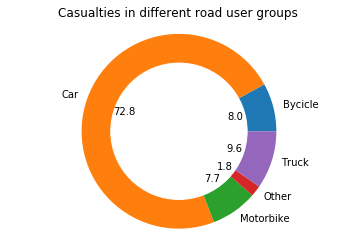

In [154]:
my_circle=plt.Circle((0,0),7, color='white')

df_figure = pd.DataFrame({'freq': df2['Vehicle_Type_adj']})
df_figure.groupby('freq', as_index=False).size().plot(kind='pie',radius=10,autopct='%.1f',title='Casualties in different road user groups')

p=plt.gcf()
p.gca().add_artist(my_circle)
plt.axis('equal')

plt.ylabel('')
plt.show()

In [155]:
df2['Age_Band_of_Driver'].value_counts()

6.0     48073
7.0     37723
8.0     34640
5.0     22077
9.0     20946
4.0     14642
10.0    10594
11.0     6608
3.0      1638
2.0       411
1.0        41
Name: Age_Band_of_Driver, dtype: int64

In [156]:
df2["Age_Band_of_Driver"].replace(np.nan,  df2.Age_Band_of_Driver.mode()[0], inplace=True)

In [157]:
df2['Vehicle_Leaving_Carriageway'].value_counts()

0.0    193352
1.0     11979
7.0      5852
2.0      1467
3.0       950
4.0       816
8.0       712
5.0       510
6.0       195
Name: Vehicle_Leaving_Carriageway, dtype: int64

In [158]:
df2["Vehicle_Leaving_Carriageway"].replace(np.nan, df2.Vehicle_Leaving_Carriageway.mode()[0], inplace=True)

For later analysis, we find the heaviest vehicle involved in the accident, then the dataframe will be concatanated with the most vulnerable element from the casualty type group.

In [159]:
Vehicle_Type=df2.groupby(by='Accident_Index', axis=0, as_index=True)['Vehicle_Type_adj'].agg(max)
df_temp=pd.DataFrame(Vehicle_Type).reset_index()
df=df_temp
df['Accident_Index'] = df['Accident_Index'].astype(str)
df.head()

Accident_Index Vehicle_Type_adj
0  2018010080971              Car
1  2018010080973              Car
2  2018010080974              Car
3  2018010080981            Truck
4  2018010080982              Car

In [160]:
Vehicle_Leaving_Carriageway=df2.groupby(by='Accident_Index', axis=0, as_index=True)['Vehicle_Leaving_Carriageway'].agg(max)
df_temp=pd.DataFrame(Vehicle_Leaving_Carriageway).reset_index()
df_temp['Accident_Index'] = df_temp['Accident_Index'].astype(str)
df=pd.merge(df,df_temp,on='Accident_Index',sort=True, how='outer') #adding the variable to the final dataframe
df.head()

Accident_Index Vehicle_Type_adj  Vehicle_Leaving_Carriageway
0  2018010080971              Car                          0.0
1  2018010080973              Car                          0.0
2  2018010080974              Car                          3.0
3  2018010080981            Truck                          0.0
4  2018010080982              Car                          1.0

As for the driver's age, the minimum value is extracted from the database. Whether a young driver causes an accient or they just be victims, their participation in an accident may be a factor determining the outcome. For example an inexperienced driver may more likely loose control over the vehicle under certain meteorogical circumstances and they might also less likely able to avoid an accident that other drivers cause.

In [161]:
Age_Band_of_Driver=df2.groupby(by='Accident_Index', axis=0, as_index=True)['Age_Band_of_Driver'].agg(min)
df_temp=pd.DataFrame(Age_Band_of_Driver).reset_index()
df_temp['Accident_Index'] = df_temp['Accident_Index'].astype(str)
df=pd.merge(df,df_temp,on='Accident_Index',sort=True, how='outer')
df.head()

Accident_Index Vehicle_Type_adj  Vehicle_Leaving_Carriageway  \
0  2018010080971              Car                          0.0   
1  2018010080973              Car                          0.0   
2  2018010080974              Car                          3.0   
3  2018010080981            Truck                          0.0   
4  2018010080982              Car                          1.0   

   Age_Band_of_Driver  
0                 6.0  
1                 6.0  
2                 5.0  
3                 6.0  
4                 7.0

In [162]:
df3=df3[['Accident_Index','Casualty_Type','Pedestrian_Location']]

In [163]:
df3.replace(-1, np.nan, inplace=True)
missing_data = df3.isnull()
missing_data.head(5)

Accident_Index  Casualty_Type  Pedestrian_Location
0           False          False                False
1           False          False                False
2           False          False                False
3           False          False                False
4           False          False                False

In [164]:
for column in missing_data.columns.values.tolist():
    print(column)
    print (missing_data[column].value_counts())
    print("") 

Accident_Index
False    160597
Name: Accident_Index, dtype: int64

Casualty_Type
False    160590
True          7
Name: Casualty_Type, dtype: int64

Pedestrian_Location
False    160593
True          4
Name: Pedestrian_Location, dtype: int64



In [165]:
df3['Casualty_Type'].value_counts()

9.0     90913
0.0     22432
1.0     17550
3.0      7221
5.0      5766
19.0     3945
11.0     3801
8.0      2781
4.0      2093
2.0      1440
21.0      665
90.0      560
10.0      285
97.0      254
98.0      246
20.0      215
22.0      201
17.0       92
16.0       75
23.0       44
18.0       11
Name: Casualty_Type, dtype: int64

In [166]:
df3["Casualty_Type"].replace(np.nan, df3.Casualty_Type.mode()[0], inplace=True)

In [167]:
df3['Pedestrian_Location'].value_counts()

0.0     138163
5.0       9153
1.0       3603
6.0       2308
10.0      2280
9.0       2217
4.0       1657
8.0        926
7.0        124
2.0        107
3.0         55
Name: Pedestrian_Location, dtype: int64

In [168]:
df3["Pedestrian_Location"].replace(np.nan, df3.Pedestrian_Location.mode()[0], inplace=True)

In [169]:
Risk_Group=[]
for casualty in df3['Casualty_Type']:
        if casualty>=0 or casualty<=5 or casualty==23 or casualty==97: Risk_Group.append(1) #Pedestrians, cyclist or motorcyclist
        else: Risk_Group.append(0)
df3['Risk_Group']=Risk_Group

In [170]:
Risk_Count=df3.groupby(by='Accident_Index', axis=0, as_index=True)['Risk_Group'].agg(sum) #counting total number of casualties from risk groups
df_temp=pd.DataFrame(Risk_Count).reset_index()
df_temp['Accident_Index'] = df_temp['Accident_Index'].astype(str)
df=pd.merge(df,df_temp,on='Accident_Index',sort=True, how='outer')
df.head()

Accident_Index Vehicle_Type_adj  Vehicle_Leaving_Carriageway  \
0  2018010080971              Car                          0.0   
1  2018010080973              Car                          0.0   
2  2018010080974              Car                          3.0   
3  2018010080981            Truck                          0.0   
4  2018010080982              Car                          1.0   

   Age_Band_of_Driver  Risk_Group  
0                 6.0           2  
1                 6.0           1  
2                 5.0           1  
3                 6.0           1  
4                 7.0           2

In [171]:
Ped_Loc=df3.groupby(by='Accident_Index', axis=0, as_index=True)['Pedestrian_Location'].agg(max) #0 corresponds to no pedestrian crossing, 1 to zebra crossing, above to irregular crossing
df_temp=pd.DataFrame(Ped_Loc).reset_index()
df_temp['Accident_Index'] = df_temp['Accident_Index'].astype(str)
df=pd.merge(df,df_temp,on='Accident_Index',sort=True, how='outer')
df.head()

Accident_Index Vehicle_Type_adj  Vehicle_Leaving_Carriageway  \
0  2018010080971              Car                          0.0   
1  2018010080973              Car                          0.0   
2  2018010080974              Car                          3.0   
3  2018010080981            Truck                          0.0   
4  2018010080982              Car                          1.0   

   Age_Band_of_Driver  Risk_Group  Pedestrian_Location  
0                 6.0           2                  0.0  
1                 6.0           1                  5.0  
2                 5.0           1                  0.0  
3                 6.0           1                  0.0  
4                 7.0           2                  0.0

In [173]:
df1=df1[['Accident_Index','Severity','Number_of_Vehicles',
       'Number_of_Casualties','Day_of_Week','1st_Road_Class','Road_Type',
       'Speed_limit','Junction_Detail','Junction_Control','Light_Conditions','Weather_Conditions',
         'Road_Surface_Conditions','Urban_or_Rural_Area',]]  #selecting the target variables for further analysis
df1['Accident_Index'] = df1['Accident_Index'].astype(str)
df1.head()

C:\Anaconda\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """


Accident_Index Severity  Number_of_Vehicles  Number_of_Casualties  \
0  2018010080971   Slight                   2                     2   
1  2018010080973   Slight                   1                     1   
2  2018010080974   Slight                   2                     1   
3  2018010080981   Severe                   2                     1   
4  2018010080982   Severe                   2                     2   

   Day_of_Week  1st_Road_Class  Road_Type  Speed_limit  Junction_Detail  \
0            2               3          3           30                0   
1            2               4          6           30                2   
2            2               3          6           20                6   
3            2               4          3           30                7   
4            2               3          6           30                0   

   Junction_Control  Light_Conditions  Weather_Conditions  \
0                -1                 4                   1   
1                 4                 4                   1   
2                 4                 4                   1   
3                 2                 4                   2   
4                -1                 4                   1   

   Road_Surface_Conditions  Urban_or_Rural_Area  
0                        1                    1  
1                        1                    1  
2                        1                    1  
3                        2                    1  
4                        2                    1

In [174]:
df=pd.merge(df,df1,on='Accident_Index',sort=True, how='outer')
df.head()

Accident_Index Vehicle_Type_adj  Vehicle_Leaving_Carriageway  \
0  2018010080971              Car                          0.0   
1  2018010080973              Car                          0.0   
2  2018010080974              Car                          3.0   
3  2018010080981            Truck                          0.0   
4  2018010080982              Car                          1.0   

   Age_Band_of_Driver  Risk_Group  Pedestrian_Location Severity  \
0                 6.0           2                  0.0   Slight   
1                 6.0           1                  5.0   Slight   
2                 5.0           1                  0.0   Slight   
3                 6.0           1                  0.0   Severe   
4                 7.0           2                  0.0   Severe   

   Number_of_Vehicles  Number_of_Casualties  Day_of_Week  1st_Road_Class  \
0                   2                     2            2               3   
1                   1                     1            2               4   
2                   2                     1            2               3   
3                   2                     1            2               4   
4                   2                     2            2               3   

   Road_Type  Speed_limit  Junction_Detail  Junction_Control  \
0          3           30                0                -1   
1          6           30                2                 4   
2          6           20                6                 4   
3          3           30                7                 2   
4          6           30                0                -1   

   Light_Conditions  Weather_Conditions  Road_Surface_Conditions  \
0                 4                   1                        1   
1                 4                   1                        1   
2                 4                   1                        1   
3                 4                   2                        2   
4                 4                   1                        2   

   Urban_or_Rural_Area  
0                    1  
1                    1  
2                    1  
3                    1  
4                    1

In [175]:
df.replace(-1, np.nan, inplace=True)

In [176]:
missing_data = df.isnull()
missing_data.head(5)

Accident_Index  Vehicle_Type_adj  Vehicle_Leaving_Carriageway  \
0           False             False                        False   
1           False             False                        False   
2           False             False                        False   
3           False             False                        False   
4           False             False                        False   

   Age_Band_of_Driver  Risk_Group  Pedestrian_Location  Severity  \
0               False       False                False     False   
1               False       False                False     False   
2               False       False                False     False   
3               False       False                False     False   
4               False       False                False     False   

   Number_of_Vehicles  Number_of_Casualties  Day_of_Week  1st_Road_Class  \
0               False                 False        False           False   
1               False                 False        False           False   
2               False                 False        False           False   
3               False                 False        False           False   
4               False                 False        False           False   

   Road_Type  Speed_limit  Junction_Detail  Junction_Control  \
0      False        False            False              True   
1      False        False            False             False   
2      False        False            False             False   
3      False        False            False             False   
4      False        False            False              True   

   Light_Conditions  Weather_Conditions  Road_Surface_Conditions  \
0             False               False                    False   
1             False               False                    False   
2             False               False                    False   
3             False               False                    False   
4             False               False                    False   

   Urban_or_Rural_Area  
0                False  
1                False  
2                False  
3                False  
4                False

#### Finding and Replacing Missing values 

In [177]:
for column in missing_data.columns.values.tolist():
    print(column)
    print (missing_data[column].value_counts())
    print("")  

Accident_Index
False    122635
Name: Accident_Index, dtype: int64

Vehicle_Type_adj
False    122635
Name: Vehicle_Type_adj, dtype: int64

Vehicle_Leaving_Carriageway
False    122635
Name: Vehicle_Leaving_Carriageway, dtype: int64

Age_Band_of_Driver
False    122635
Name: Age_Band_of_Driver, dtype: int64

Risk_Group
False    122635
Name: Risk_Group, dtype: int64

Pedestrian_Location
False    122635
Name: Pedestrian_Location, dtype: int64

Severity
False    122635
Name: Severity, dtype: int64

Number_of_Vehicles
False    122635
Name: Number_of_Vehicles, dtype: int64

Number_of_Casualties
False    122635
Name: Number_of_Casualties, dtype: int64

Day_of_Week
False    122635
Name: Day_of_Week, dtype: int64

1st_Road_Class
False    122635
Name: 1st_Road_Class, dtype: int64

Road_Type
False    122635
Name: Road_Type, dtype: int64

Speed_limit
False    122635
Name: Speed_limit, dtype: int64

Junction_Detail
False    121863
True        772
Name: Junction_Detail, dtype: int64

Junction_Control
F

In [178]:
df.drop('Junction_Control',axis='columns',inplace=True) #close to half of the variables are missing, so this variable might not become a good predictor

In [179]:
df.shape

(122635, 18)

In [180]:
df['Urban_or_Rural_Area'].value_counts()

1.0    82583
2.0    39996
3.0       55
Name: Urban_or_Rural_Area, dtype: int64

In [181]:
df["Urban_or_Rural_Area"].replace(np.nan, 1.0, inplace=True)
df["Urban_or_Rural_Area"].replace(3.0, 1.0, inplace=True)

In [182]:
df['Junction_Detail'].value_counts()

0.0    52076
3.0    35958
6.0    11422
1.0     9974
9.0     4650
8.0     2801
5.0     1798
2.0     1597
7.0     1587
Name: Junction_Detail, dtype: int64

In [183]:
df["Junction_Detail"].replace(np.nan, 3.0, inplace=True)

In [184]:
df['Weather_Conditions'].value_counts()

1.0    99221
2.0    12789
9.0     3666
8.0     2603
5.0     1277
4.0     1134
3.0     1075
7.0      449
6.0      402
Name: Weather_Conditions, dtype: int64

In [185]:
df["Weather_Conditions"].replace(np.nan, 1.0, inplace=True)

In [186]:
df['Road_Surface_Conditions'].value_counts()

1.0    90546
2.0    28215
4.0     1417
3.0     1099
5.0      135
Name: Road_Surface_Conditions, dtype: int64

In [187]:
df["Road_Surface_Conditions"].replace(np.nan, 1.0, inplace=True)

#### Preparing the Data for Modelling

_Weather Conditions_

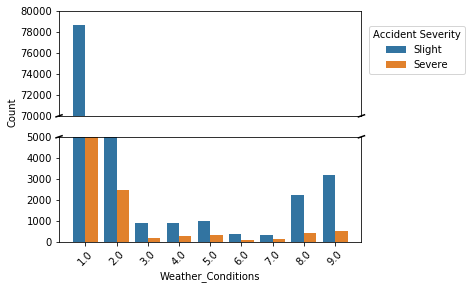

In [188]:
brokenaxis('Weather_Conditions',5000,70000,80000,df)

In [189]:
Weather_Conditions=[]
for weather in df['Weather_Conditions']:
    if weather==1 or severity==4: Weather_Conditions.append('Fine')
    elif weather==2 or weather==3 or weather==5 or weather==6: Weather_Conditions.append('Precipitation')
    elif weather==7:Weather_Conditions.append('Fog_or_Mist')
    else: Weather_Conditions.append('Other_Weather')
df['Weather']=Weather_Conditions
df.drop('Weather_Conditions',axis=1,inplace=True)

In [190]:
df = pd.concat([df,pd.get_dummies(df['Weather'])], axis=1)
df.drop(['Weather'], axis = 1,inplace=True)
df.drop(['Other_Weather'], axis = 1,inplace=True)
df.head()

Accident_Index Vehicle_Type_adj  Vehicle_Leaving_Carriageway  \
0  2018010080971              Car                          0.0   
1  2018010080973              Car                          0.0   
2  2018010080974              Car                          3.0   
3  2018010080981            Truck                          0.0   
4  2018010080982              Car                          1.0   

   Age_Band_of_Driver  Risk_Group  Pedestrian_Location Severity  \
0                 6.0           2                  0.0   Slight   
1                 6.0           1                  5.0   Slight   
2                 5.0           1                  0.0   Slight   
3                 6.0           1                  0.0   Severe   
4                 7.0           2                  0.0   Severe   

   Number_of_Vehicles  Number_of_Casualties  Day_of_Week  1st_Road_Class  \
0                   2                     2            2               3   
1                   1                     1            2               4   
2                   2                     1            2               3   
3                   2                     1            2               4   
4                   2                     2            2               3   

   Road_Type  Speed_limit  Junction_Detail  Light_Conditions  \
0          3           30              0.0                 4   
1          6           30              2.0                 4   
2          6           20              6.0                 4   
3          3           30              7.0                 4   
4          6           30              0.0                 4   

   Road_Surface_Conditions  Urban_or_Rural_Area  Fine  Fog_or_Mist  \
0                      1.0                  1.0     1            0   
1                      1.0                  1.0     1            0   
2                      1.0                  1.0     1            0   
3                      2.0                  1.0     0            0   
4                      2.0                  1.0     1            0   

   Precipitation  
0              0  
1              0  
2              0  
3              1  
4              0

_Road Type_

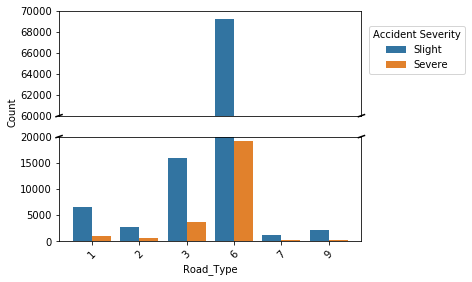

In [191]:
brokenaxis('Road_Type',20000,60000,70000,df)

In [192]:
Road=[]
for road in df['Road_Type']:
    if road==6: Road.append('Single_Carriageway')
    elif road==3: Road.append('Dual_Carriageway')
    else: Road.append('Other_Road')
df['Road']=Road
df.drop('Road_Type',axis=1,inplace=True)

In [193]:
df = pd.concat([df,pd.get_dummies(df['Road'])], axis=1)
df.drop('Road',axis=1,inplace=True)
df.head()

Accident_Index Vehicle_Type_adj  Vehicle_Leaving_Carriageway  \
0  2018010080971              Car                          0.0   
1  2018010080973              Car                          0.0   
2  2018010080974              Car                          3.0   
3  2018010080981            Truck                          0.0   
4  2018010080982              Car                          1.0   

   Age_Band_of_Driver  Risk_Group  Pedestrian_Location Severity  \
0                 6.0           2                  0.0   Slight   
1                 6.0           1                  5.0   Slight   
2                 5.0           1                  0.0   Slight   
3                 6.0           1                  0.0   Severe   
4                 7.0           2                  0.0   Severe   

   Number_of_Vehicles  Number_of_Casualties  Day_of_Week         ...          \
0                   2                     2            2         ...           
1                   1                     1            2         ...           
2                   2                     1            2         ...           
3                   2                     1            2         ...           
4                   2                     2            2         ...           

   Junction_Detail  Light_Conditions  Road_Surface_Conditions  \
0              0.0                 4                      1.0   
1              2.0                 4                      1.0   
2              6.0                 4                      1.0   
3              7.0                 4                      2.0   
4              0.0                 4                      2.0   

   Urban_or_Rural_Area  Fine  Fog_or_Mist  Precipitation  Dual_Carriageway  \
0                  1.0     1            0              0                 1   
1                  1.0     1            0              0                 0   
2                  1.0     1            0              0                 0   
3                  1.0     0            0              1                 1   
4                  1.0     1            0              0                 0   

   Other_Road  Single_Carriageway  
0           0                   0  
1           0                   1  
2           0                   1  
3           0                   0  
4           0                   1  

[5 rows x 22 columns]

_Road Surface Conditions_

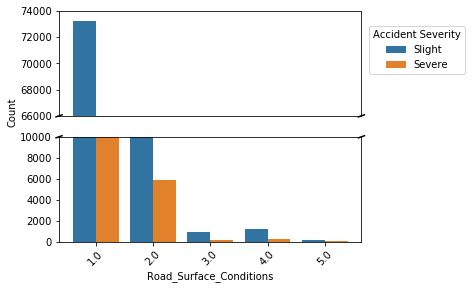

In [194]:
brokenaxis('Road_Surface_Conditions',10000,66000,74000,df)

In [195]:
Road_Surface=[]
for surface in df['Road_Surface_Conditions']:
    if surface==1: Road_Surface.append('Dry')
    elif surface>=2 or surface<=6:Road_Surface.append('Wet')
    else: Road_Surface.append('Mud')
df['Road_Surface']=Road_Surface
df.drop('Road_Surface_Conditions',axis=1,inplace=True)

In [196]:
df = pd.concat([df,pd.get_dummies(df['Road_Surface'])], axis=1)
df.drop(['Road_Surface'], axis = 1,inplace=True)
df.head()

Accident_Index Vehicle_Type_adj  Vehicle_Leaving_Carriageway  \
0  2018010080971              Car                          0.0   
1  2018010080973              Car                          0.0   
2  2018010080974              Car                          3.0   
3  2018010080981            Truck                          0.0   
4  2018010080982              Car                          1.0   

   Age_Band_of_Driver  Risk_Group  Pedestrian_Location Severity  \
0                 6.0           2                  0.0   Slight   
1                 6.0           1                  5.0   Slight   
2                 5.0           1                  0.0   Slight   
3                 6.0           1                  0.0   Severe   
4                 7.0           2                  0.0   Severe   

   Number_of_Vehicles  Number_of_Casualties  Day_of_Week ...   \
0                   2                     2            2 ...    
1                   1                     1            2 ...    
2                   2                     1            2 ...    
3                   2                     1            2 ...    
4                   2                     2            2 ...    

   Light_Conditions  Urban_or_Rural_Area  Fine  Fog_or_Mist  Precipitation  \
0                 4                  1.0     1            0              0   
1                 4                  1.0     1            0              0   
2                 4                  1.0     1            0              0   
3                 4                  1.0     0            0              1   
4                 4                  1.0     1            0              0   

   Dual_Carriageway  Other_Road  Single_Carriageway  Dry  Wet  
0                 1           0                   0    1    0  
1                 0           0                   1    1    0  
2                 0           0                   1    1    0  
3                 1           0                   0    0    1  
4                 0           0                   1    0    1  

[5 rows x 23 columns]

_Day of Week_

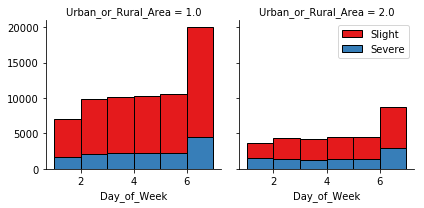

In [197]:
bins = np.linspace(df.Day_of_Week.min(), df.Day_of_Week.max(), 7)
g = sns.FacetGrid(df, col="Urban_or_Rural_Area", hue='Severity', palette="Set1", col_wrap=2)
g.map(plt.hist, 'Day_of_Week', bins=bins, ec="k")

g.axes[-1].legend()

plt.show()

It is visible based on the figure that more accidents happen on Saturday than on any other days of the week. This can be explained by more 'weekend drivers' on the roads and driving to attend leisure activities. 

In [198]:
Day_of_week=[]
for day in df['Day_of_Week']:
    if day==7: Day_of_week.append('Saturday')
    else: Day_of_week.append('Other_days')
df['Day']=Day_of_week
df.drop('Day_of_Week',axis=1,inplace=True)

In [199]:
df = pd.concat([df,pd.get_dummies(df['Day'])], axis=1)
df.drop(['Day'], axis = 1,inplace=True)
df.drop(['Other_days'], axis = 1,inplace=True)
df.head()

Accident_Index Vehicle_Type_adj  Vehicle_Leaving_Carriageway  \
0  2018010080971              Car                          0.0   
1  2018010080973              Car                          0.0   
2  2018010080974              Car                          3.0   
3  2018010080981            Truck                          0.0   
4  2018010080982              Car                          1.0   

   Age_Band_of_Driver  Risk_Group  Pedestrian_Location Severity  \
0                 6.0           2                  0.0   Slight   
1                 6.0           1                  5.0   Slight   
2                 5.0           1                  0.0   Slight   
3                 6.0           1                  0.0   Severe   
4                 7.0           2                  0.0   Severe   

   Number_of_Vehicles  Number_of_Casualties  1st_Road_Class    ...     \
0                   2                     2               3    ...      
1                   1                     1               4    ...      
2                   2                     1               3    ...      
3                   2                     1               4    ...      
4                   2                     2               3    ...      

   Urban_or_Rural_Area  Fine  Fog_or_Mist  Precipitation  Dual_Carriageway  \
0                  1.0     1            0              0                 1   
1                  1.0     1            0              0                 0   
2                  1.0     1            0              0                 0   
3                  1.0     0            0              1                 1   
4                  1.0     1            0              0                 0   

   Other_Road  Single_Carriageway  Dry  Wet  Saturday  
0           0                   0    1    0         0  
1           0                   1    1    0         0  
2           0                   1    1    0         0  
3           0                   0    0    1         0  
4           0                   1    0    1         0  

[5 rows x 23 columns]

_Vehicle Type from the Drivers' Group_

In [203]:
df = pd.concat([df,pd.get_dummies(df['Vehicle_Type_adj'])], axis=1)
df.drop(['Vehicle_Type_adj'], axis = 1,inplace=True)
df.head()

Accident_Index  Vehicle_Leaving_Carriageway  Age_Band_of_Driver  Risk_Group  \
0  2018010080971                          0.0                 6.0           2   
1  2018010080973                          0.0                 6.0           1   
2  2018010080974                          3.0                 5.0           1   
3  2018010080981                          0.0                 6.0           1   
4  2018010080982                          1.0                 7.0           2   

   Pedestrian_Location Severity  Number_of_Vehicles  Number_of_Casualties  \
0                  0.0   Slight                   2                     2   
1                  5.0   Slight                   1                     1   
2                  0.0   Slight                   2                     1   
3                  0.0   Severe                   2                     1   
4                  0.0   Severe                   2                     2   

   1st_Road_Class  Speed_limit  ...    Other_Road  Single_Carriageway  Dry  \
0               3           30  ...             0                   0    1   
1               4           30  ...             0                   1    1   
2               3           20  ...             0                   1    1   
3               4           30  ...             0                   0    0   
4               3           30  ...             0                   1    0   

   Wet  Saturday  Bycicle  Car  Motorbike  Other  Truck  
0    0         0        0    1          0      0      0  
1    0         0        0    1          0      0      0  
2    0         0        0    1          0      0      0  
3    1         0        0    0          0      0      1  
4    1         0        0    1          0      0      0  

[5 rows x 27 columns]

_Speed Limit_

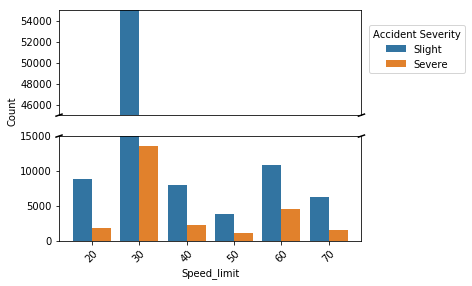

In [204]:
brokenaxis('Speed_limit',15000,45000,55000,df)

As the variable is on a numeric scale, there is no transformation needed.

_Junction Detail_

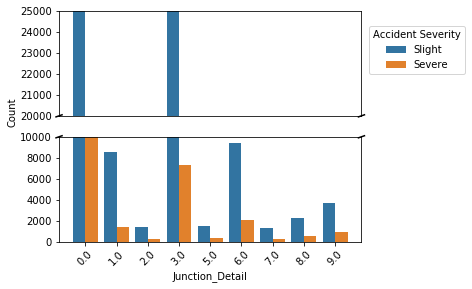

In [205]:
brokenaxis('Junction_Detail',10000,20000,25000,df)

In [206]:
Junction=[]
for junction in df['Junction_Detail']:
    if junction==0: Junction.append('Not_at_Junction')
    elif junction==1 or junction==2:Junction.append('Roundabout')
    elif junction==3 or junction==6 or junction==7 or junction==8:Junction.append('Crossroads')
    elif junction==5:Junction.append('Slip_Road')
    else: Junction.append('Other_Junction')
df['Junction']=Junction
df.drop('Junction_Detail',axis=1,inplace=True)

In [207]:
df = pd.concat([df,pd.get_dummies(df['Junction'])], axis=1)
df.drop(['Junction'], axis = 1,inplace=True)
df.drop(['Roundabout'], axis = 1,inplace=True)
df.head()

Accident_Index  Vehicle_Leaving_Carriageway  Age_Band_of_Driver  Risk_Group  \
0  2018010080971                          0.0                 6.0           2   
1  2018010080973                          0.0                 6.0           1   
2  2018010080974                          3.0                 5.0           1   
3  2018010080981                          0.0                 6.0           1   
4  2018010080982                          1.0                 7.0           2   

   Pedestrian_Location Severity  Number_of_Vehicles  Number_of_Casualties  \
0                  0.0   Slight                   2                     2   
1                  5.0   Slight                   1                     1   
2                  0.0   Slight                   2                     1   
3                  0.0   Severe                   2                     1   
4                  0.0   Severe                   2                     2   

   1st_Road_Class  Speed_limit    ...      Saturday  Bycicle  Car  Motorbike  \
0               3           30    ...             0        0    1          0   
1               4           30    ...             0        0    1          0   
2               3           20    ...             0        0    1          0   
3               4           30    ...             0        0    0          0   
4               3           30    ...             0        0    1          0   

   Other  Truck  Crossroads  Not_at_Junction  Other_Junction  Slip_Road  
0      0      0           0                1               0          0  
1      0      0           0                0               0          0  
2      0      0           1                0               0          0  
3      0      1           1                0               0          0  
4      0      0           0                1               0          0  

[5 rows x 30 columns]

_Light Conditions_

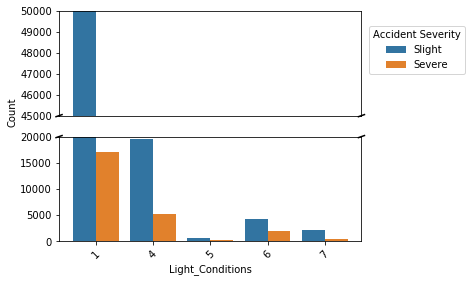

In [208]:
brokenaxis('Light_Conditions',20000,45000,50000,df)

In [209]:
Light=[]
for light in df['Light_Conditions']:
    if light==1: Light.append('Daylight')
    elif light==4: Light.append('Darkness_Lights_Lit')
    elif light==5 or light==6: Light.append('Darkness')
    else: Light.append('Light_Unknown')
df['Light']=Light
df.drop('Light_Conditions',axis=1,inplace=True)

In [210]:
df = pd.concat([df,pd.get_dummies(df['Light'])], axis=1)
df.drop(['Light'], axis = 1,inplace=True)
df.drop(['Daylight'], axis = 1,inplace=True)
df.drop(['Darkness_Lights_Lit'], axis = 1,inplace=True)
df.drop(['Light_Unknown'], axis = 1,inplace=True)
df.head()

Accident_Index  Vehicle_Leaving_Carriageway  Age_Band_of_Driver  Risk_Group  \
0  2018010080971                          0.0                 6.0           2   
1  2018010080973                          0.0                 6.0           1   
2  2018010080974                          3.0                 5.0           1   
3  2018010080981                          0.0                 6.0           1   
4  2018010080982                          1.0                 7.0           2   

   Pedestrian_Location Severity  Number_of_Vehicles  Number_of_Casualties  \
0                  0.0   Slight                   2                     2   
1                  5.0   Slight                   1                     1   
2                  0.0   Slight                   2                     1   
3                  0.0   Severe                   2                     1   
4                  0.0   Severe                   2                     2   

   1st_Road_Class  Speed_limit    ...     Bycicle  Car  Motorbike  Other  \
0               3           30    ...           0    1          0      0   
1               4           30    ...           0    1          0      0   
2               3           20    ...           0    1          0      0   
3               4           30    ...           0    0          0      0   
4               3           30    ...           0    1          0      0   

   Truck  Crossroads  Not_at_Junction  Other_Junction  Slip_Road  Darkness  
0      0           0                1               0          0         0  
1      0           0                0               0          0         0  
2      0           1                0               0          0         0  
3      1           1                0               0          0         0  
4      0           0                1               0          0         0  

[5 rows x 30 columns]

_Road Class_

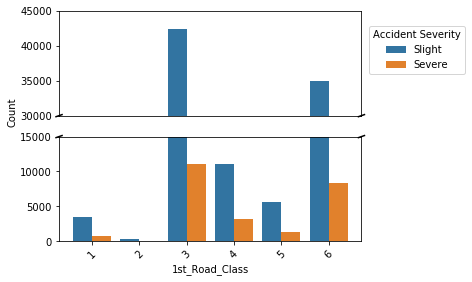

In [212]:
brokenaxis('1st_Road_Class',15000,30000,45000,df)

In [213]:
Motorway=[]
for road in df['1st_Road_Class']:
    if road==4 or road==5: Motorway.append('Distributor_Road')
    else: Motorway.append('Other_Road')
df['Road_Class']=Motorway
df.drop('1st_Road_Class',axis=1,inplace=True)

In [214]:
df = pd.concat([df,pd.get_dummies(df['Road_Class'])], axis=1)
df.drop(['Road_Class'], axis = 1,inplace=True)
df.drop(['Other_Road'], axis = 1,inplace=True)
df.head()

Accident_Index  Vehicle_Leaving_Carriageway  Age_Band_of_Driver  Risk_Group  \
0  2018010080971                          0.0                 6.0           2   
1  2018010080973                          0.0                 6.0           1   
2  2018010080974                          3.0                 5.0           1   
3  2018010080981                          0.0                 6.0           1   
4  2018010080982                          1.0                 7.0           2   

   Pedestrian_Location Severity  Number_of_Vehicles  Number_of_Casualties  \
0                  0.0   Slight                   2                     2   
1                  5.0   Slight                   1                     1   
2                  0.0   Slight                   2                     1   
3                  0.0   Severe                   2                     1   
4                  0.0   Severe                   2                     2   

   Speed_limit  Urban_or_Rural_Area        ...         Car  Motorbike  Other  \
0           30                  1.0        ...           1          0      0   
1           30                  1.0        ...           1          0      0   
2           20                  1.0        ...           1          0      0   
3           30                  1.0        ...           0          0      0   
4           30                  1.0        ...           1          0      0   

   Truck  Crossroads  Not_at_Junction  Other_Junction  Slip_Road  Darkness  \
0      0           0                1               0          0         0   
1      0           0                0               0          0         0   
2      0           1                0               0          0         0   
3      1           1                0               0          0         0   
4      0           0                1               0          0         0   

   Distributor_Road  
0                 0  
1                 1  
2                 0  
3                 1  
4                 0  

[5 rows x 29 columns]

_Urban or Rural Area_

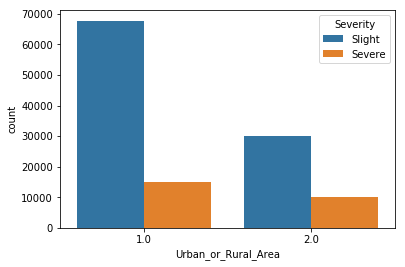

In [216]:
ax = sns.countplot(x="Urban_or_Rural_Area", hue="Severity", data=df)
plt.show()

In [217]:
UrbRur=[]
for road in df['Urban_or_Rural_Area']:
    if road==2: UrbRur.append('Rural')
    else: UrbRur.append('Urban')
df['UrbRur']=UrbRur
df.drop('Urban_or_Rural_Area',axis=1,inplace=True)

In [218]:
df = pd.concat([df,pd.get_dummies(df['UrbRur'])], axis=1)
df.drop(['UrbRur'], axis = 1,inplace=True)
df.drop(['Urban'], axis = 1,inplace=True)
df.head()

Accident_Index  Vehicle_Leaving_Carriageway  Age_Band_of_Driver  Risk_Group  \
0  2018010080971                          0.0                 6.0           2   
1  2018010080973                          0.0                 6.0           1   
2  2018010080974                          3.0                 5.0           1   
3  2018010080981                          0.0                 6.0           1   
4  2018010080982                          1.0                 7.0           2   

   Pedestrian_Location Severity  Number_of_Vehicles  Number_of_Casualties  \
0                  0.0   Slight                   2                     2   
1                  5.0   Slight                   1                     1   
2                  0.0   Slight                   2                     1   
3                  0.0   Severe                   2                     1   
4                  0.0   Severe                   2                     2   

   Speed_limit  Fine  ...    Motorbike  Other  Truck  Crossroads  \
0           30     1  ...            0      0      0           0   
1           30     1  ...            0      0      0           0   
2           20     1  ...            0      0      0           1   
3           30     0  ...            0      0      1           1   
4           30     1  ...            0      0      0           0   

   Not_at_Junction  Other_Junction  Slip_Road  Darkness  Distributor_Road  \
0                1               0          0         0                 0   
1                0               0          0         0                 1   
2                0               0          0         0                 0   
3                0               0          0         0                 1   
4                1               0          0         0                 0   

   Rural  
0      0  
1      0  
2      0  
3      0  
4      0  

[5 rows x 29 columns]

_Age Band of Driver_

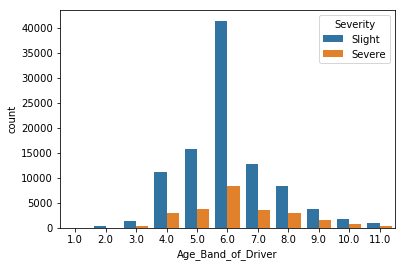

In [219]:
ax = sns.countplot(x="Age_Band_of_Driver", hue="Severity", data=df)
plt.show()

In [220]:
Driver_Age=[]
for age in df['Age_Band_of_Driver']:
    if age==6: Driver_Age.append('Median_Age(26-35)')
    else: Driver_Age.append('Other_Age')
df['Driver_Age']=Driver_Age
df.drop('Age_Band_of_Driver',axis=1,inplace=True)

In [221]:
df = pd.concat([df,pd.get_dummies(df['Driver_Age'])], axis=1)
df.drop(['Driver_Age'], axis = 1,inplace=True)
df.drop(['Other_Age'], axis = 1,inplace=True)
df.head()

Accident_Index  Vehicle_Leaving_Carriageway  Risk_Group  \
0  2018010080971                          0.0           2   
1  2018010080973                          0.0           1   
2  2018010080974                          3.0           1   
3  2018010080981                          0.0           1   
4  2018010080982                          1.0           2   

   Pedestrian_Location Severity  Number_of_Vehicles  Number_of_Casualties  \
0                  0.0   Slight                   2                     2   
1                  5.0   Slight                   1                     1   
2                  0.0   Slight                   2                     1   
3                  0.0   Severe                   2                     1   
4                  0.0   Severe                   2                     2   

   Speed_limit  Fine  Fog_or_Mist        ...          Other  Truck  \
0           30     1            0        ...              0      0   
1           30     1            0        ...              0      0   
2           20     1            0        ...              0      0   
3           30     0            0        ...              0      1   
4           30     1            0        ...              0      0   

   Crossroads  Not_at_Junction  Other_Junction  Slip_Road  Darkness  \
0           0                1               0          0         0   
1           0                0               0          0         0   
2           1                0               0          0         0   
3           1                0               0          0         0   
4           0                1               0          0         0   

   Distributor_Road  Rural  Median_Age(26-35)  
0                 0      0                  1  
1                 1      0                  1  
2                 0      0                  0  
3                 1      0                  1  
4                 0      0                  0  

[5 rows x 29 columns]

_Vehicle Leaving Carriageway_

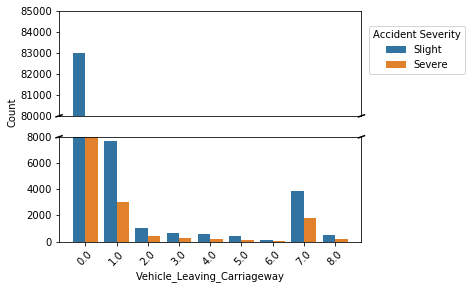

In [222]:
brokenaxis('Vehicle_Leaving_Carriageway',8000,80000,85000,df)

In [223]:
VLC=[]
for lvcrgw in df['Vehicle_Leaving_Carriageway']:
    if lvcrgw==0: VLC.append('Vehicle_Staying_in_Carriageway')
    else: VLC.append('Vehicle_Left_Carriageway')
df['VLC']=VLC
df.drop('Vehicle_Leaving_Carriageway',axis=1,inplace=True)

In [224]:
df = pd.concat([df,pd.get_dummies(df['VLC'])], axis=1)
df.drop(['VLC'], axis = 1,inplace=True)
df.drop(['Vehicle_Left_Carriageway'], axis = 1,inplace=True)
df.head()

Accident_Index  Risk_Group  Pedestrian_Location Severity  \
0  2018010080971           2                  0.0   Slight   
1  2018010080973           1                  5.0   Slight   
2  2018010080974           1                  0.0   Slight   
3  2018010080981           1                  0.0   Severe   
4  2018010080982           2                  0.0   Severe   

   Number_of_Vehicles  Number_of_Casualties  Speed_limit  Fine  Fog_or_Mist  \
0                   2                     2           30     1            0   
1                   1                     1           30     1            0   
2                   2                     1           20     1            0   
3                   2                     1           30     0            0   
4                   2                     2           30     1            0   

   Precipitation               ...                Truck  Crossroads  \
0              0               ...                    0           0   
1              0               ...                    0           0   
2              0               ...                    0           1   
3              1               ...                    1           1   
4              0               ...                    0           0   

   Not_at_Junction  Other_Junction  Slip_Road  Darkness  Distributor_Road  \
0                1               0          0         0                 0   
1                0               0          0         0                 1   
2                0               0          0         0                 0   
3                0               0          0         0                 1   
4                1               0          0         0                 0   

   Rural  Median_Age(26-35)  Vehicle_Staying_in_Carriageway  
0      0                  1                               1  
1      0                  1                               1  
2      0                  0                               0  
3      0                  1                               1  
4      0                  0                               0  

[5 rows x 29 columns]

_Pedestrian Location_

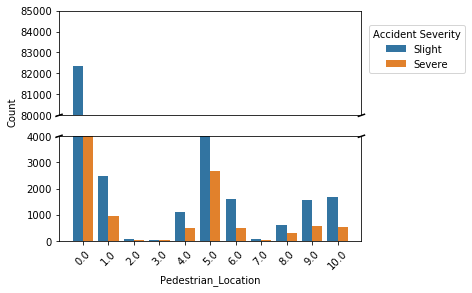

In [225]:
brokenaxis('Pedestrian_Location',4000,80000,85000,df)

In [226]:
PedCross=[]
for pedestrian in df['Pedestrian_Location']:
    if pedestrian==0: PedCross.append('Not_Pedestrian')
    elif pedestrian==1: PedCross.append('Zebra_Crossing')
    else: PedCross.append('Irregular_Crossing')
df['PedCross']=PedCross
df.drop('Pedestrian_Location',axis=1,inplace=True)

In [227]:
df = pd.concat([df,pd.get_dummies(df['PedCross'])], axis=1)
df.drop(['PedCross'], axis = 1,inplace=True)
df.drop(['Not_Pedestrian'], axis = 1,inplace=True)
df.drop(['Zebra_Crossing'], axis = 1,inplace=True)
df.head()

Accident_Index  Risk_Group Severity  Number_of_Vehicles  \
0  2018010080971           2   Slight                   2   
1  2018010080973           1   Slight                   1   
2  2018010080974           1   Slight                   2   
3  2018010080981           1   Severe                   2   
4  2018010080982           2   Severe                   2   

   Number_of_Casualties  Speed_limit  Fine  Fog_or_Mist  Precipitation  \
0                     2           30     1            0              0   
1                     1           30     1            0              0   
2                     1           20     1            0              0   
3                     1           30     0            0              1   
4                     2           30     1            0              0   

   Dual_Carriageway         ...          Crossroads  Not_at_Junction  \
0                 1         ...                   0                1   
1                 0         ...                   0                0   
2                 0         ...                   1                0   
3                 1         ...                   1                0   
4                 0         ...                   0                1   

   Other_Junction  Slip_Road  Darkness  Distributor_Road  Rural  \
0               0          0         0                 0      0   
1               0          0         0                 1      0   
2               0          0         0                 0      0   
3               0          0         0                 1      0   
4               0          0         0                 0      0   

   Median_Age(26-35)  Vehicle_Staying_in_Carriageway  Irregular_Crossing  
0                  1                               1                   0  
1                  1                               1                   1  
2                  0                               0                   0  
3                  1                               1                   0  
4                  0                               0                   0  

[5 rows x 29 columns]

#### Selecting the Features for Modelling

In [229]:
print(list(df.columns))
print(df.shape)

['Accident_Index', 'Risk_Group', 'Severity', 'Number_of_Vehicles', 'Number_of_Casualties', 'Speed_limit', 'Fine', 'Fog_or_Mist', 'Precipitation', 'Dual_Carriageway', 'Single_Carriageway', 'Dry', 'Wet', 'Saturday', 'Bycicle', 'Car', 'Motorbike', 'Other', 'Truck', 'Crossroads', 'Not_at_Junction', 'Other_Junction', 'Slip_Road', 'Darkness', 'Distributor_Road', 'Rural', 'Median_Age(26-35)', 'Vehicle_Staying_in_Carriageway', 'Irregular_Crossing']
(122635, 29)


In [231]:
Feature=df[['Risk_Group', 'Number_of_Vehicles', 'Number_of_Casualties',
            'Speed_limit', 'Fog_or_Mist', 'Precipitation',
             'Single_Carriageway', 'Wet', 'Bycicle',
             'Motorbike', 'Truck', 'Crossroads',
             'Darkness', 'Distributor_Road', 'Rural', 'Median_Age(26-35)',
            'Irregular_Crossing', 'Vehicle_Staying_in_Carriageway','Saturday']]
Feature.head()

Risk_Group  Number_of_Vehicles  Number_of_Casualties  Speed_limit  \
0           2                   2                     2           30   
1           1                   1                     1           30   
2           1                   2                     1           20   
3           1                   2                     1           30   
4           2                   2                     2           30   

   Fog_or_Mist  Precipitation  Single_Carriageway  Wet  Bycicle  Motorbike  \
0            0              0                   0    0        0          0   
1            0              0                   1    0        0          0   
2            0              0                   1    0        0          0   
3            0              1                   0    1        0          0   
4            0              0                   1    1        0          0   

   Truck  Crossroads  Darkness  Distributor_Road  Rural  Median_Age(26-35)  \
0      0           0         0                 0      0                  1   
1      0           0         0                 1      0                  1   
2      0           1         0                 0      0                  0   
3      1           1         0                 1      0                  1   
4      0           0         0                 0      0                  0   

   Irregular_Crossing  Vehicle_Staying_in_Carriageway  Saturday  
0                   0                               1         0  
1                   1                               1         0  
2                   0                               0         0  
3                   0                               1         0  
4                   0                               0         0

In [232]:
X=Feature
y=df[['Severity']].values

#### Sampling

As the distribution of the target variable is skewed, it is necessairy for the model development to balance the training sample between slight and severe accidents. For this procedure, the balanced sampler is imported from the sklearn library that will take an equal proportion of both slight and severe accidents. It is imporant to note that the sampler should be used on the training sample and the model is then evaluated on the test sample. In this case, the undersampler method is used, which reduces the number of observations from the majority class (slight injuries) by finding the nearest neighbours. 

In [233]:
!pip install imbalanced-learn --user

In [234]:
# check version number
import imblearn
print(imblearn.__version__)

# check version number
import imblearn
print(imblearn.__version__)

0.7.0
0.7.0


In [235]:
from collections import Counter
from sklearn.datasets import make_classification
from imblearn.under_sampling import RandomUnderSampler # doctest: +NORMALIZE_WHITESPACE

# define undersample strategy
undersample = RandomUnderSampler(sampling_strategy='majority')

In [236]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.2, random_state=7)
print ('Train set:', X_train.shape,  y_train.shape)
print ('Test set:', X_test.shape,  y_test.shape)

Train set: (98108, 19) (98108, 1)
Test set: (24527, 19) (24527, 1)


In [237]:
Accident_Severity=[]
for severity in y_train:
    if severity=='Severe': Accident_Severity.append(0)
    else: Accident_Severity.append(1)
y_train_t=Accident_Severity     #the random sampler transforms y values into integers, so they need to be transformed before and after the sampling to keep track the original values.

In [242]:
>>> from collections import Counter
>>> from sklearn.datasets import make_classification
>>> from imblearn.under_sampling import RandomUnderSampler # doctest: +NORMALIZE_WHITESPACE
>>> X_train, y_train_t = make_classification(n_classes=2, class_sep=2,
...  weights=[0.2, 0.8], n_informative=5, n_redundant=1, flip_y=0,
... n_features=19, n_clusters_per_class=2, n_samples=98000, random_state=7)
>>> print('Original dataset shape %s' % Counter(y_train_t))
>>> rus = RandomUnderSampler(random_state=7)
>>> X_res, y_res = rus.fit_resample(X_train, y_train_t)
>>> print('Resampled dataset shape %s' % Counter(y_res))

Original dataset shape Counter({1: 78400, 0: 19600})
Resampled dataset shape Counter({0: 19600, 1: 19600})


Following using the train_test_spilt method, the training sample had been reduced to 98000 observation, which was used for undersampling. Then the undersampler selected 39,200 observations in both the slight and severe categories. This balanced sample is used for training the model, and then the model is tested with the remaining samples from the test set.

In [243]:
Accident_Severity=[]
for severity in y_res:
    if severity==0: Accident_Severity.append('Severe')
    else: Accident_Severity.append('Slight')
y_res=Accident_Severity

_Normalising the test set for the analysis._

In [244]:
X_test= preprocessing.StandardScaler().fit(X_test).transform(X_test)
X_test[0:5]

array([[-0.41811532, -1.178787  , -0.41811532, -1.21174343, -0.06462236,
        -0.37345112,  0.6226915 , -0.57228136, -0.0985674 , -0.37895887,
        -0.43965408, -0.8621696 , -0.24058731, -0.45736162, -0.6960643 ,
         1.22202351,  2.39313564,  0.45207327, -0.39117522],
       [-0.41811532,  0.20981627, -0.41811532,  1.61951534, -0.06462236,
        -0.37345112, -1.60593166, -0.57228136, -0.0985674 , -0.37895887,
        -0.43965408, -0.8621696 , -0.24058731, -0.45736162,  1.43664889,
         1.22202351, -0.41786181, -2.2120308 , -0.39117522],
       [-0.41811532, -1.178787  , -0.41811532, -1.21174343, -0.06462236,
        -0.37345112,  0.6226915 , -0.57228136, -0.0985674 , -0.37895887,
        -0.43965408, -0.8621696 , -0.24058731, -0.45736162, -0.6960643 ,
        -0.81831486, -0.41786181,  0.45207327, -0.39117522],
       [-0.41811532,  0.20981627, -0.41811532, -0.50392874, 15.47452049,
        -0.37345112,  0.6226915 ,  1.74739223, -0.0985674 , -0.37895887,
        -0.439

## Modeling

### Support Vector Machine

In [257]:
from sklearn import svm
clf = svm.SVC(kernel='poly', gamma='auto')
clf.fit(X_res, y_res) 
yhat = clf.predict(X_test)
yhat [0:5]

array(['Slight', 'Severe', 'Severe', 'Slight', 'Slight'], dtype='<U6')

In [258]:
from sklearn.metrics import classification_report, confusion_matrix
import itertools

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

              precision    recall  f1-score   support

      Severe       0.23      0.43      0.30      4811
      Slight       0.82      0.65      0.73     19716

    accuracy                           0.61     24527
   macro avg       0.53      0.54      0.51     24527
weighted avg       0.71      0.61      0.64     24527

Confusion matrix, without normalization
[[ 2087  2724]
 [ 6928 12788]]


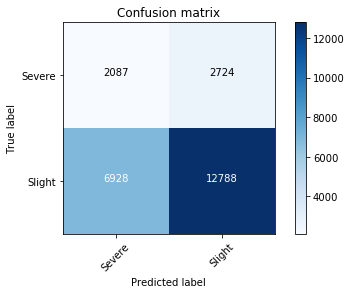

In [259]:
cnf_matrix = confusion_matrix(y_test, yhat, labels=['Severe','Slight'])
np.set_printoptions(precision=2)

print (classification_report(y_test, yhat))

plt.figure()
plot_confusion_matrix(cnf_matrix, classes=['Severe','Slight'],normalize= False,  title='Confusion matrix')

### Classification Tree

In [248]:
from sklearn.datasets import load_iris
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeClassifier

AccidentTree = DecisionTreeClassifier(criterion="entropy", max_depth = 5)
AccidentTree.fit(X_res,y_res)
predTree = AccidentTree.predict(X_test)
print (predTree [0:5])
print (y_test [0:5])

['Slight' 'Slight' 'Slight' 'Slight' 'Slight']
[['Slight']
 ['Slight']
 ['Slight']
 ['Slight']
 ['Slight']]


In [249]:
from sklearn import metrics
import matplotlib.pyplot as plt
print("DecisionTrees's Accuracy: ", metrics.accuracy_score(y_test, predTree))

f1 = metrics.f1_score(predTree, y_test, average='weighted')

print("F1-score: ", f1)

DecisionTrees's Accuracy:  0.8003017083214417
F1-score:  0.8791223760976256


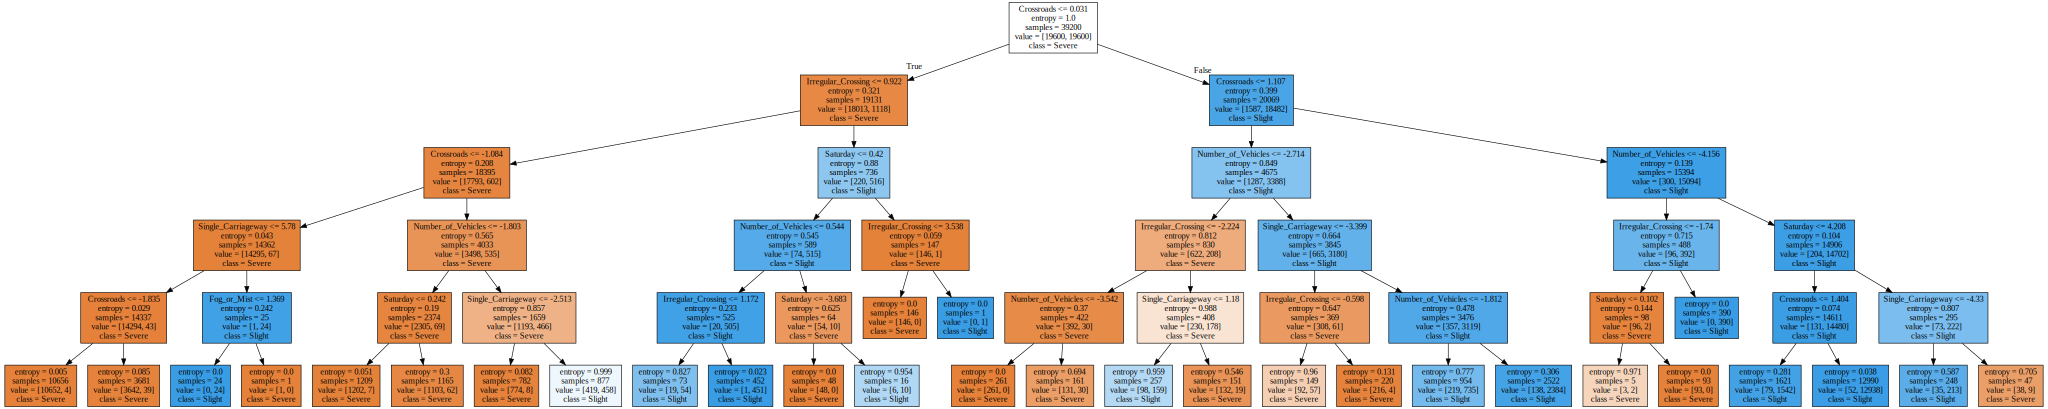

In [250]:
import graphviz
from sklearn import tree
# DOT data
dot_data = tree.export_graphviz(AccidentTree, out_file=None, 
                                feature_names=Feature.columns,  
                                class_names=np.unique(y_res),
                                filled=True)

# Draw graph
graph = graphviz.Source(dot_data, format="png") 
graph

## Evaluation

As mentioned in the previous section, the clean data has been split into a training set and a test test. The training set is resampled using the imbalanced learn function from the sktlearn library to balance the target variable. Both the test set and the training set has been normilised, but the test set was not balanced to avoid bias.

Based on the results from the 2 models, the classification tree has the highest accuracy with 80% and a F1 score of 0.87. In other words, it could predict the outcome of 4 out of 5 accidents. The Support Vector Machine had an overall lower accuracy, but it still could predict that under a given set of circumstances, every 4th accident will likely to be severe or fatal. Unfortunaltely, it also misdiagnosed some cases that were actually severe accidents, but were classified slight by the model. This is also reflected by the weighted precision and F1 scores, which are 0.71 and 0.64 respectively. 

In sum, the classification tree seems the most accurate model for deployment.

## Deployment

The model is ready for deployment and to be integrated into an application that can predict an accident outcome based on a number of factors considered. The model can be used for early warning systems for law enforcement and healthcare workers to be prepared for severe accidents and apply preventive measures to mitigate the risks of fatality. It can be also used for furhter examination by road infrastructure maintanance workers to detect potential risk factors and install safety barriers, apply road closures, temporary speed limits and warnings for drivers.